In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline

In [13]:
from sklearn.preprocessing import scale

map = {}

xls = pd.ExcelFile('nba_draft.xlsx')
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

df = [
#     map['draft_data_1976'], 
#     map['draft_data_1977'], 
#     map['draft_data_1978'], 
#     map['draft_data_1979'], 
#     map['draft_data_1980'], 
#     map['draft_data_1981'], 
#     map['draft_data_1982'], 
#     map['draft_data_1983'], 
#     map['draft_data_1984'], 
#     map['draft_data_1985'], 
#     map['draft_data_1986'], 
#     map['draft_data_1987'], 
#     map['draft_data_1988'], 
#     map['draft_data_1989'], 
    map['draft_data_1990'], 
    map['draft_data_1991'], 
    map['draft_data_1992'], 
    map['draft_data_1993'], 
    map['draft_data_1994'], 
    map['draft_data_1995'], 
    map['draft_data_1996'], 
    map['draft_data_1997'], 
    map['draft_data_1998'], 
    map['draft_data_1999'], 
    map['draft_data_2000'], 
    map['draft_data_2001'], 
    map['draft_data_2002'], 
    map['draft_data_2003'], 
    map['draft_data_2004'], 
    map['draft_data_2005'], 
    map['draft_data_2006'], 
    map['draft_data_2007'], 
    map['draft_data_2008'], 
    map['draft_data_2009'], 
    map['draft_data_2010'], 
    map['draft_data_2011'], 
    map['draft_data_2012'], 
    map['draft_data_2013'], 
    map['draft_data_2014'], 
    map['draft_data_2015'], 
    map['draft_data_2016'], 
    map['draft_data_2017'], 
    map['draft_data_2018'], 
    map['draft_data_2019'],
    map['draft_data_2020']
]


df = pd.concat(df)
df = df[df['Pk']  <= 20]
df = df[df['position']  == 'Point']

533


In [4]:
color_theme = np.array(['red','blue','green', 'yellow', 'orange'])

# Point Guard Clustering

## Testing Tendencies

In [11]:
num_clusters = 3

pg_df_1 = df.iloc[:, 41:-5]
data = pg_df_1.to_numpy()
# data = scale(data)
clustering  = KMeans(n_clusters=num_clusters,random_state=5)
clustering.fit(data)
pg_df_1.columns = ['ppg','rpg','apg']
print(len(data))

118


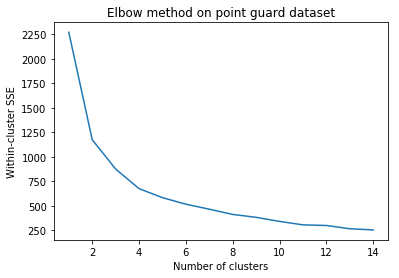

In [6]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pg_df_1)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on point guard dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[17.99636364  4.39272727  4.28363636]
 [12.87962963  3.63333333  4.79444444]
 [24.34444444  4.28888889  5.25555556]]


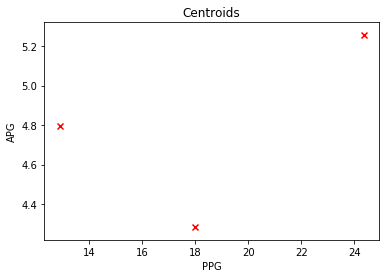

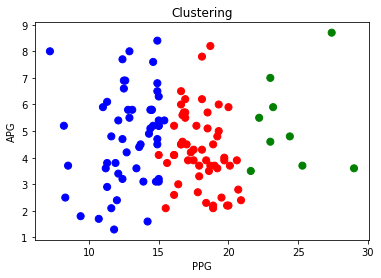

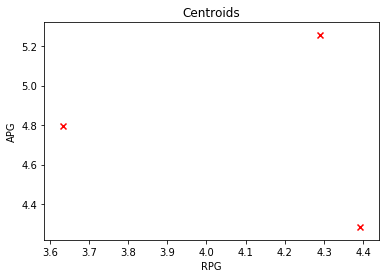

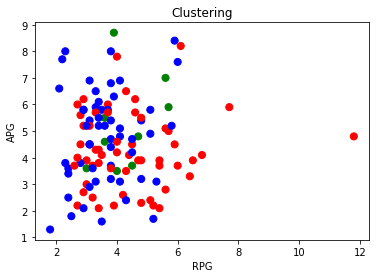

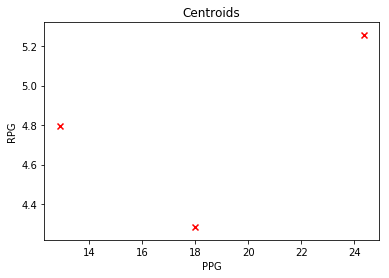

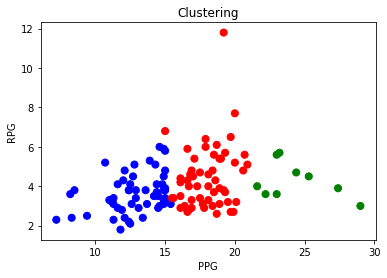

In [7]:
centroids = clustering.cluster_centers_
print(centroids)

plt.scatter(centroids[:,0], centroids[:,2], marker="x", color='r')
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,1], centroids[:,2], marker="x", color='r')
plt.title('Centroids')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.rpg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,0], centroids[:,2], marker="x", color='r')
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.rpg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

Text(0.5, 0, 'PPG')

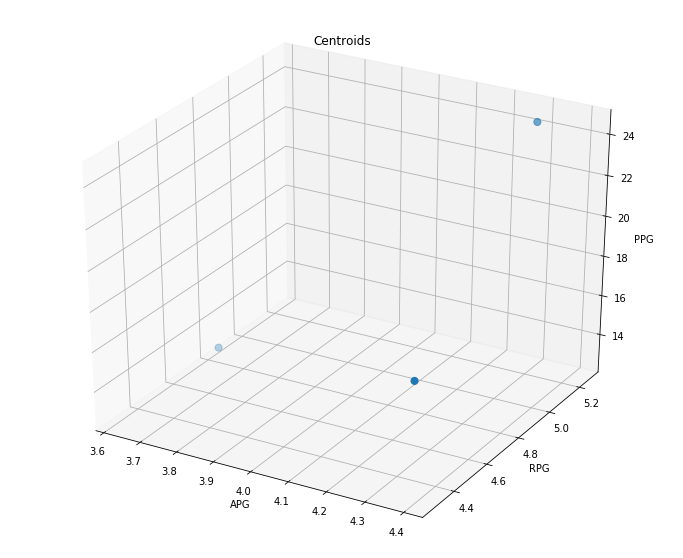

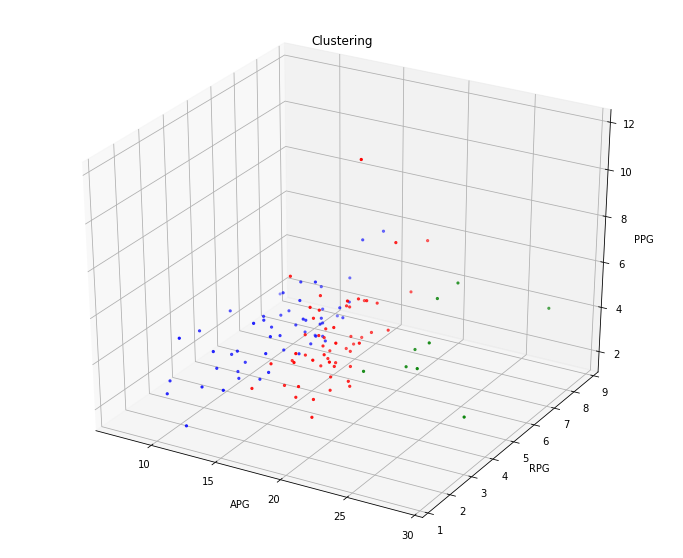

In [8]:
fig = plt.figure(figsize=(12,10))
centroid_3d = fig.add_subplot(111, projection='3d')
centroid_3d.scatter(xs=centroids[:,1],ys=centroids[:,2], zs = centroids[:,0], s=50)
centroid_3d.set_title('Centroids')
centroid_3d.set_xlabel('APG')
centroid_3d.set_ylabel('RPG')
centroid_3d.set_zlabel('PPG')

fig2 = plt.figure(figsize=(12,10))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=pg_df_1.ppg,ys=pg_df_1.apg, zs = pg_df_1.rpg, c=color_theme[clustering.labels_],s=5)
ax.set_title('Clustering')
ax.set_xlabel('APG')
ax.set_ylabel('RPG')
ax.set_zlabel('PPG')

In [14]:
print(clustering.labels_)
print(len(clustering.labels_))

[0 2 1 0 1 2 0 2 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 2 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 2 1 0 1 1 1 1 0 0 1 1 2 1 1 1 0 0 0 0
 0 2 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 2 1
 0 0 2 0 1 0 0]
118


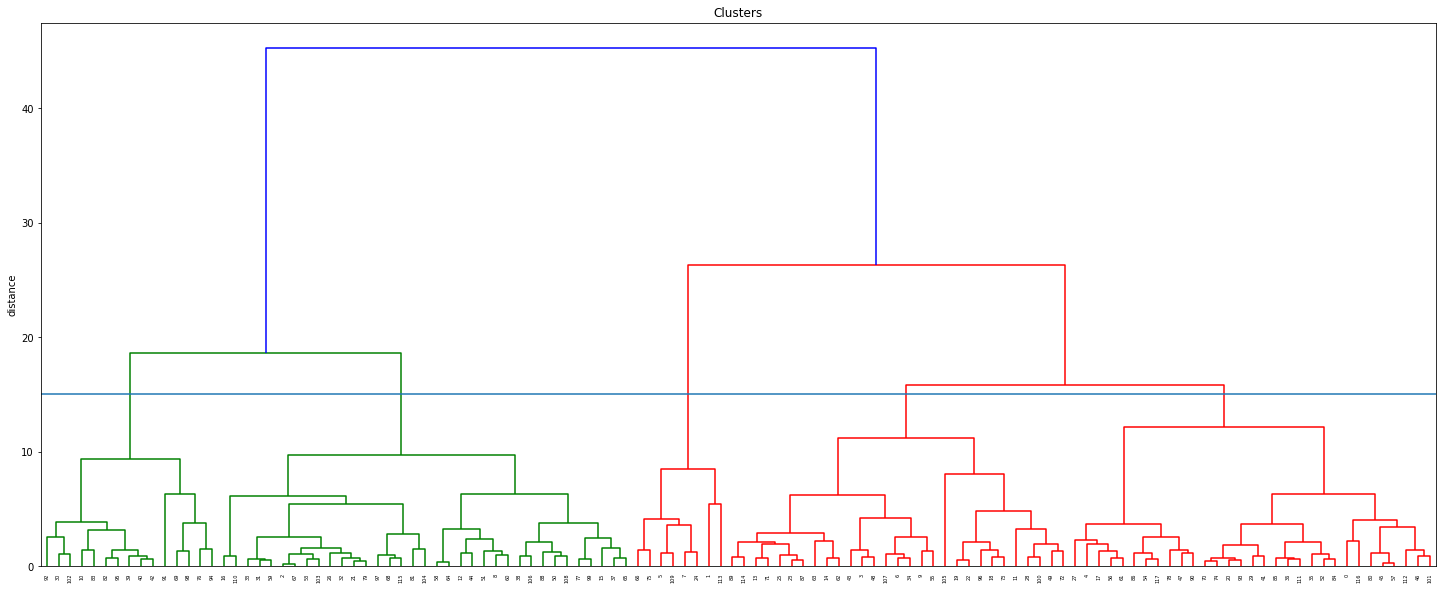

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pg_df_1,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()